In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2025-03-25 22:17:20.853929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742928440.868987    7735 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742928440.873832    7735 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 22:17:20.888135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Classification

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

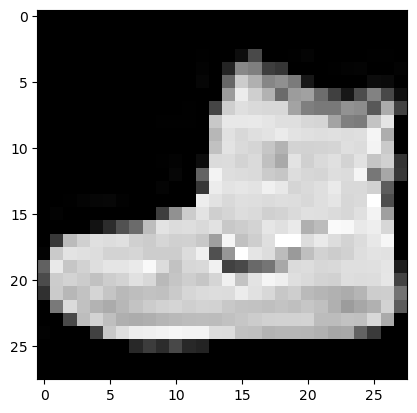

In [10]:
plt.imshow(x_train[0,], cmap="gray")

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [12]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
W0000 00:00:1742928443.779836    7735 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Activation name=activation, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <LeakyReLU name=leaky_re_lu, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
weights = model.layers[1].get_weights()

In [16]:
weights

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

# Compile Model

In [17]:
sgd = keras.optimizers.SGD(clipvalue=1.0)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

# Fit Model

In [19]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.15,
                    )

Epoch 1/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7163 - loss: 0.8877 - val_accuracy: 0.8299 - val_loss: 0.4876
Epoch 2/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8230 - loss: 0.5040 - val_accuracy: 0.8448 - val_loss: 0.4351
Epoch 3/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8443 - loss: 0.4481 - val_accuracy: 0.8546 - val_loss: 0.4110
Epoch 4/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8539 - loss: 0.4186 - val_accuracy: 0.8574 - val_loss: 0.3975
Epoch 5/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8571 - loss: 0.4041 - val_accuracy: 0.8627 - val_loss: 0.3863


In [20]:
history.history

{'accuracy': [0.7801372408866882,
  0.8292157053947449,
  0.845235288143158,
  0.8528627157211304,
  0.8580588102340698],
 'loss': [0.6670615673065186,
  0.487568199634552,
  0.44477733969688416,
  0.4210265278816223,
  0.4012792706489563],
 'val_accuracy': [0.8298888802528381,
  0.8447777628898621,
  0.8545555472373962,
  0.8574444651603699,
  0.862666666507721],
 'val_loss': [0.48759642243385315,
  0.4350530207157135,
  0.41101109981536865,
  0.39745014905929565,
  0.38632816076278687]}

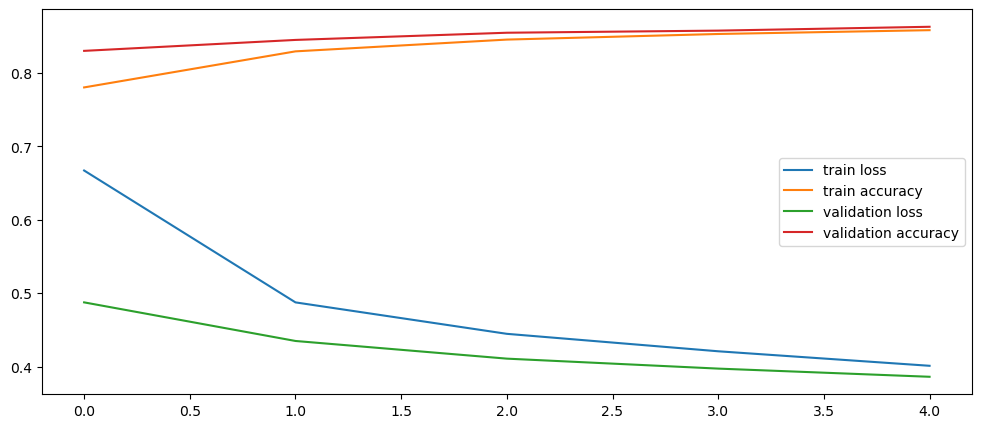

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,498 (353.51 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

 Optimizer params: 2 (12.00 B)

# Save Model

In [23]:
model.save("model0.keras")
model0 = keras.models.load_model("model0.keras")

In [24]:
model0.get_weights()[4]

array([[-0.02175808, -0.0423382 ,  0.10543017, ..., -0.00969413,
        -0.09539114,  0.05633445],
       [-0.08612008, -0.02415011,  0.05515308, ...,  0.08305632,
         0.03069873, -0.03884266],
       [ 0.10641257,  0.09351788,  0.01337566, ..., -0.07291871,
         0.00043516, -0.05278804],
       ...,
       [-0.03771385,  0.09305852,  0.04513333, ...,  0.08246326,
         0.08110268,  0.11095033],
       [-0.10280211, -0.03543622, -0.11022446, ...,  0.01752152,
        -0.03866934, -0.06244573],
       [ 0.00762047,  0.0340936 ,  0.06668773, ..., -0.08067961,
        -0.09031466,  0.01490016]], dtype=float32)

In [25]:
model0_cloned = keras.models.clone_model(model0)

In [35]:
model0_cloned.set_weights(model0_cloned.get_weights())

In [34]:
model0.get_weights()[4]

array([[-0.02175808, -0.0423382 ,  0.10543017, ..., -0.00969413,
        -0.09539114,  0.05633445],
       [-0.08612008, -0.02415011,  0.05515308, ...,  0.08305632,
         0.03069873, -0.03884266],
       [ 0.10641257,  0.09351788,  0.01337566, ..., -0.07291871,
         0.00043516, -0.05278804],
       ...,
       [-0.03771385,  0.09305852,  0.04513333, ...,  0.08246326,
         0.08110268,  0.11095033],
       [-0.10280211, -0.03543622, -0.11022446, ...,  0.01752152,
        -0.03866934, -0.06244573],
       [ 0.00762047,  0.0340936 ,  0.06668773, ..., -0.08067961,
        -0.09031466,  0.01490016]], dtype=float32)

In [26]:
model0.layers

[<Flatten name=flatten, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Activation name=activation, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <LeakyReLU name=leaky_re_lu, built=True>,
 <Dense name=dense_2, built=True>]

In [27]:
model0.layers[4].trainable

True

In [28]:
model1 = keras.models.Sequential([model0.layers[-1]])

In [29]:
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [30]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
for layer in model1.layers:
    print(layer.trainable)

True
True


In [32]:
for layer in model1.layers[:-1]:
    layer.trainable = False
    print(layer.trainable)

False


In [33]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 760 (2.97 KB)

In [53]:
X_train = x_train[:100]

In [36]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [52]:
X_train_new = X_train[:5000, :, :]

In [38]:
y_train_new = np.where(y_train == 9, 1, 0)[:5000]

In [39]:
np.sum(y_train_new)

np.int64(506)

# Compile Model

In [54]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fit Model

In [57]:
model1.fit(x_train, y_train_new, epochs=5, validation_split=0.15)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 51000
'y' sizes: 5000
